In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y=df['label']
x=df.drop(columns=['label'])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
x_train=x_train.values

In [31]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 246,  50,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 254,
        87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

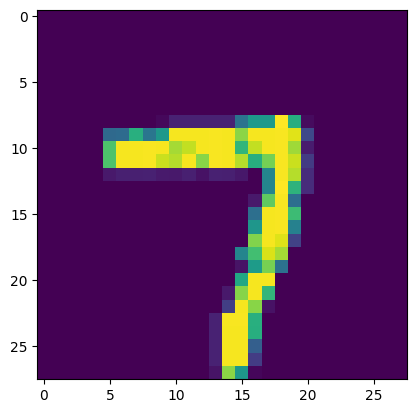

In [36]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(x_train[1000],(28,28)))

In [37]:
x_train=x_train/255
x_test=x_test/255

In [40]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [64]:
model=Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [65]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [66]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6354 - val_loss: 0.1940
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1550 - val_loss: 0.1298
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1061 - val_loss: 0.1249
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0744 - val_loss: 0.1015
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0522 - val_loss: 0.1249
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0433 - val_loss: 0.1065
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0376 - val_loss: 0.1294
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0294 - val_loss: 0.1200
Epoch 9/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0229 - val_loss: 0.1222
Epoch 10/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0178 - val_loss: 0.1165


In [67]:
y_prob=model.predict(x_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [68]:
y_prob=y_prob.argmax(axis=1)

In [69]:
y_prob

array([3, 2, 7, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score,r2_score

In [71]:
accuracy_score(y_test,y_prob)

0.9705

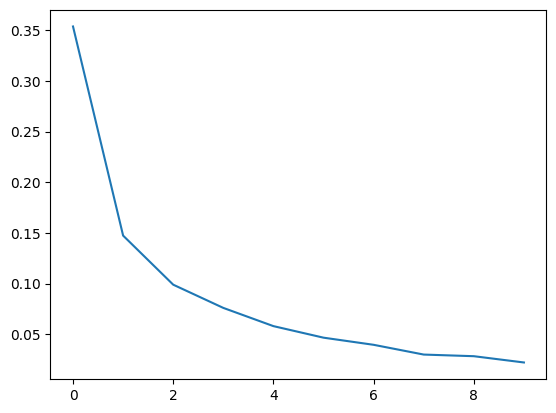

In [72]:
plt.plot(history.history['loss'])

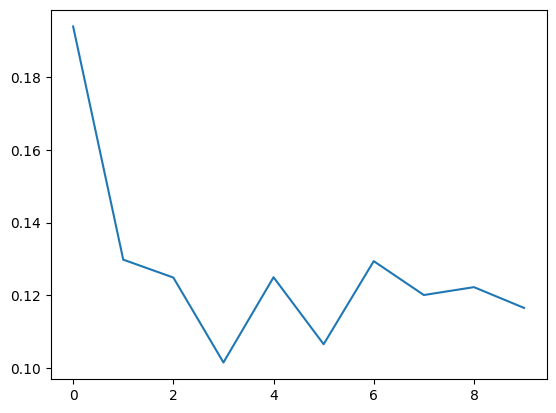

In [75]:
plt.plot(history.history['val_loss'])